<a href="https://colab.research.google.com/github/sangithajk/Hackathon/blob/master/Credit_Score_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("/content/drive/My Drive/CreditScore_train.csv")
test = pd.read_csv("/content/drive/My Drive/CreditScore_test.csv")

In [0]:
train["source"] = "train"
test["source"] = "test"
df = pd.concat([train,test])

In [0]:
df.head()

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,x011,x012,x013,x014,x015,x016,x017,x018,x019,x020,x021,x022,x023,x024,x025,x026,x027,x028,x029,x030,x031,x032,x033,x034,x035,x036,x037,x038,x039,x040,...,x267,x268,x269,x270,x271,x272,x273,x274,x275,x276,x277,x278,x279,x280,x281,x282,x283,x284,x285,x286,x287,x288,x289,x290,x291,x292,x293,x294,x295,x296,x297,x298,x299,x300,x301,x302,x303,x304,y,source
0,1084094,426.0,39.0,128.0,426.0,0,0,0,0,0,2,4,4,9,19,5,14,8,5,6,2,3,2,1,1,1,1,6,1,5,0,0,0,0,0,0,0,0,0,0,...,NaN,NaN,0,0,0,0.1943,484289,0,NaN,0,0,0,484289,0,484289,1,1,1,0,0,1.0,NaN,NaN,NaN,0,346762,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,807,train
1,1287777,160.0,2.0,64.0,160.0,1,1,2,0,1,3,3,7,5,21,5,16,5,3,9,2,3,1,9,1,1,1,3,9,6,0,0,0,0,0,0,0,0,0,0,...,5.5,0.8417,1,1,1,0.2356,125307,0,NaN,0,0,0,125307,0,125307,1,1,1,2,0,1.0,9.0,2.0,5.5,17318,124634,0.8417,0,NaN,17318,0.8417,1,1,1,0,NaN,0,NaN,819,train
2,1483016,163.0,16.0,104.0,239.0,0,0,0,1,0,1,0,0,6,8,3,5,4,2,7,3,3,2,0,0,0,1,0,0,4,1,0,0,0,1,1,0,0,0,1,...,NaN,NaN,0,0,0,0.0308,706,0,NaN,0,0,0,706,0,706,1,1,1,0,0,NaN,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,0,0,0,0,NaN,0,NaN,803,train
3,959054,NaN,NaN,NaN,102.0,0,0,0,0,0,0,2,2,0,4,0,4,2,0,0,0,0,0,3,0,0,0,0,0,0,7,0,0,1,4,6,0,0,1,3,...,NaN,NaN,0,0,0,0.3025,619,619,0.8123,0,0,0,0,0,0,1,1,1,0,0,9.0,NaN,NaN,NaN,0,0,NaN,0,NaN,0,NaN,1,1,1,0,NaN,0,NaN,530,train
4,1342113,3.0,2.0,2.0,62.0,0,2,2,0,0,1,2,0,0,5,2,3,2,2,2,1,1,1,3,0,1,1,0,3,2,3,0,1,1,1,3,0,1,1,1,...,2.0,1.0180,1,1,1,0.8402,38837,21424,0.7357,1,1,1,17839,426,17413,1,1,1,1,0,9.0,2.0,2.0,2.0,17413,17413,1.0180,0,NaN,17413,1.0180,1,1,1,0,NaN,0,NaN,485,train


In [0]:
df.shape

(100000, 306)

In [0]:
df.drop_duplicates(inplace=True)

In [0]:
df.isna().sum()

x001          0
x002      21432
x003      21432
x004      21424
x005       6110
x006          0
x007          0
x008          0
x009          0
x010          0
x011          0
x012          0
x013          0
x014          0
x015          0
x016          0
x017          0
x018          0
x019          0
x020          0
x021          0
x022          0
x023          0
x024          0
x025          0
x026          0
x027          0
x028          0
x029          0
x030          0
          ...  
x277          0
x278          0
x279          0
x280          0
x281          0
x282          0
x283          0
x284          0
x285          0
x286          0
x287      24821
x288      49756
x289      49756
x290      49756
x291          0
x292          0
x293      51133
x294          0
x295      86533
x296          0
x297      58112
x298          0
x299          0
x300          0
x301          0
x302      73069
x303          0
x304      81875
y             0
source        0
Length: 306, dtype: int6

In [0]:
for i in range(306) :
  if df.iloc[:,i].isna().sum() > 50000:
    print(i+1)

    

98
155
162
242
253
255
256
257
259
265
266
267
268
275
293
295
297
302
304


In [0]:
df.drop(columns=['x001','x098','x155','x162','x242','x253','x255','x256','x257','x259','x265','x266','x267','x268','x275','x293','x295','x297','x302','x304'],inplace=True)

In [0]:
#for i in range(286) :
#  print( df.iloc[:,i].isna().sum() )
for i in df.columns:
  if df.loc[:,i].isna().sum() > 0:
    print(i)
     

x002
x003
x004
x005
x041
x044
x045
x057
x058
x148
x222
x223
x234
x235
x237
x238
x239
x272
x287
x288
x289
x290


In [0]:
for i in df.columns:
  if i not in [ 'source'] :
    df[i].fillna(df[i].median(),inplace=True)

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split    
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt

In [0]:
train_final = df[df.source=="train"]
test_final = df[df.source=="test"]

In [0]:
x_train = train_final.drop(['y','source'],axis=1)
y_train = train_final['y']


In [0]:
x_test = test_final.drop(['y','source'],axis=1)
y_test = test_final['y']

In [0]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)


(80000, 284) (80000,) (20000, 284) (20000,)


In [0]:
from sklearn.linear_model import  LinearRegression
linear = LinearRegression().fit(x_train,y_train)
lr_train_predict = linear.predict(x_train)
lr_test_predict = linear.predict(x_test)
from sklearn import metrics
print("MAE value of rf train:",metrics.mean_absolute_error(y_train,lr_train_predict))
print("MAE value of rf test:",metrics.mean_absolute_error(y_test,lr_test_predict))

MAE value of rf train: 35.64575905184995
MAE value of rf test: 35.74629970859242


In [0]:
def mape_find(y_true,y_predict):
    y_true, y_predict = np.array(y_true) , np.array(y_predict)
    return np.mean(np.abs((y_true - y_predict)/y_true))*100



In [0]:
err_df = pd.DataFrame(columns=['Algo','Test MAPE','Train MAPE'])
print("MAPE value of rf train:",mape_find(y_train,lr_train_predict))
print("MAPE value of rf test:",mape_find(y_test,lr_test_predict))

print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,lr_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,lr_test_predict)))

err_df.loc[0] = ['Linear', np.sqrt(metrics.mean_squared_error(y_test,lr_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,lr_train_predict))]

MAPE value of rf train: 6.15414616712415
MAPE value of rf test: 6.188509451063522
RMSE value of rf train: 47.17941667688385
RMSE value of rf test: 47.136840790316654


In [0]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=3).fit(x_train,y_train)
dtree_train_predict = dtree.predict(x_train)
dtree_test_predict = dtree.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,dtree_train_predict))
print("MAPE value of rf test:",mape_find(y_test,dtree_test_predict))

print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,dtree_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,dtree_test_predict)))

err_df.loc[1] = ['Dtree', np.sqrt(metrics.mean_squared_error(y_test,dtree_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,dtree_train_predict))]

MAPE value of rf train: 8.049060796510009
MAPE value of rf test: 8.081355431962969
RMSE value of rf train: 60.50427951031923
RMSE value of rf test: 60.42786992357211


In [0]:
from sklearn.ensemble import  RandomForestRegressor
forest = RandomForestRegressor(n_jobs=-1,n_estimators=20, 
                                       min_samples_leaf=25, 
                                       max_features=0.3).fit(x_train, y_train)

forest_train_predict = forest.predict(x_train)
forest_test_predict = forest.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,forest_train_predict))
print("MAPE value of rf test:",mape_find(y_test,forest_test_predict))
print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,forest_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,forest_test_predict)))

err_df.loc[2] = ['RF', np.sqrt(metrics.mean_squared_error(y_test,forest_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,forest_train_predict))]

MAPE value of rf train: 3.374434935796415
MAPE value of rf test: 3.757086430409183
RMSE value of rf train: 27.482052135997353
RMSE value of rf test: 30.651829809771723


In [0]:
import xgboost as xgb
from sklearn import metrics

xgb_fit = xgb.XGBRegressor(max_depth=2, n_estimators=100, learning_rate=0.1).fit(x_train, y_train)
xgb_train_predict = xgb_fit.predict(x_train)
xgb_test_predict = xgb_fit.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,xgb_train_predict))
print("MAPE value of rf test:",mape_find(y_test,xgb_test_predict))

print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,xgb_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,xgb_test_predict)))

err_df.loc[3] = ['XGB', np.sqrt(metrics.mean_squared_error(y_test,xgb_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,xgb_train_predict))]

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[06:07:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAPE value of rf train: 4.586118089414084
MAPE value of rf test: 4.62887706906609
RMSE value of rf train: 35.835422417066205
RMSE value of rf test: 36.04916205739765


In [0]:
from sklearn.neighbors import KNeighborsRegressor
for K in range(15):
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
    neigh.fit(x_train, y_train) 
    y_pred = neigh.predict(x_test)
    print ("RMSE is ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)),"% for K-Value:",K_value)
    

RMSE is  65.23434294909393 % for K-Value: 1
RMSE is  58.09081683020131 % for K-Value: 2
RMSE is  55.47028133253978 % for K-Value: 3
RMSE is  54.31722298221808 % for K-Value: 4
RMSE is  53.67153646021325 % for K-Value: 5
RMSE is  53.389777553593746 % for K-Value: 6
RMSE is  53.14969318551412 % for K-Value: 7
RMSE is  53.034758038066414 % for K-Value: 8
RMSE is  52.91953851058076 % for K-Value: 9
RMSE is  52.85063790059681 % for K-Value: 10
RMSE is  52.82825441039659 % for K-Value: 11
RMSE is  52.85237383308026 % for K-Value: 12
RMSE is  52.89513811675448 % for K-Value: 13
RMSE is  52.924815027199344 % for K-Value: 14
RMSE is  52.960126363561905 % for K-Value: 15


In [0]:
err_df.loc[4] = ['KNN', 52.85, 52]

In [0]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression

lass = Lasso().fit(x_train, y_train)
lass_train_predict = lass.predict(x_train)
lass_test_predict = lass.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,lass_train_predict))
print("MAPE value of rf test:",mape_find(y_test,lass_test_predict))

print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,lass_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,lass_test_predict)))

err_df.loc[5] = ['Lasso', np.sqrt(metrics.mean_squared_error(y_test,lass_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,lass_train_predict))]

MAPE value of rf train: 6.5703023942845595
MAPE value of rf test: 6.558936588441863
RMSE value of rf train: 49.79862320194668
RMSE value of rf test: 49.784222674807474


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117569600.60720114, tolerance: 112066.04657994871
  positive)


In [0]:
from sklearn.linear_model import Ridge
rid = Ridge().fit(x_train, y_train)
rid_train_predict = rid.predict(x_train)
rid_test_predict = rid.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,rid_train_predict))
print("MAPE value of rf test:",mape_find(y_test,rid_test_predict))

print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,rid_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,rid_test_predict)))

err_df.loc[6] = ['Ridge', np.sqrt(metrics.mean_squared_error(y_test,rid_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,rid_train_predict))]

MAPE value of rf train: 6.154171631443435
MAPE value of rf test: 6.188506154713017
RMSE value of rf train: 47.179417834269174
RMSE value of rf test: 47.13672938274046


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.5498e-17): result may not be accurate.
  overwrite_a=True).T


In [0]:
from sklearn.linear_model import ElasticNet
en = ElasticNet().fit(x_train, y_train)
en_train_predict = en.predict(x_train)
en_test_predict = en.predict(x_test)
print("MAPE value of rf train:",mape_find(y_train,en_train_predict))
print("MAPE value of rf test:",mape_find(y_test,en_test_predict))

print("RMSE value of rf train:",np.sqrt(metrics.mean_squared_error(y_train,en_train_predict)))
print("RMSE value of rf test:",np.sqrt(metrics.mean_squared_error(y_test,en_test_predict)))

err_df.loc[7] = ['EN', np.sqrt(metrics.mean_squared_error(y_test,en_test_predict)) , np.sqrt(metrics.mean_squared_error(y_train,en_train_predict))]

MAPE value of rf train: 7.067173042826383
MAPE value of rf test: 7.051872933404107
RMSE value of rf train: 53.20190140666271
RMSE value of rf test: 53.33090380117717


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131965059.52001265, tolerance: 112066.04657994871
  positive)


     Algo  Test MAPE  Train MAPE
0  Linear  47.136841   47.179417
1   Dtree  60.427870   60.504280
2      RF  30.651830   27.482052
3     XGB  36.049162   35.835422
4     KNN  52.850000   52.000000
5   Lasso  49.784223   49.798623
6   Ridge  47.136729   47.179418
7      EN  53.330904   53.201901


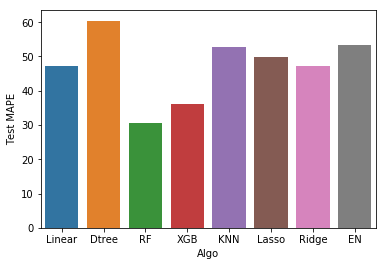

In [0]:
import seaborn as sns
print(err_df)
sns.barplot(x=err_df.Algo,y=err_df['Test MAPE'])

In [0]:
x_train.shape

(80000, 284)

In [0]:
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

model = Sequential()

model.add(Dense(20, input_dim=284))
model.add(Activation('elu'))
model.add(Dense(100))
model.add(Activation('elu'))
model.add(Dense(50))
model.add(Activation('elu'))
model.add(Dense(30))
model.add(Activation('elu'))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse'])

history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 150, verbose = 1)

Train on 56000 samples, validate on 24000 samples
Epoch 1/150
56000/56000 [==============================] - 4s 72us/step - loss: 566092.8940 - mean_squared_error: 566092.8940 - val_loss: 2281303.5164 - val_mean_squared_error: 2281303.5164
Epoch 2/150
56000/56000 [==============================] - 4s 66us/step - loss: 168973.5255 - mean_squared_error: 168973.5255 - val_loss: 87225.8562 - val_mean_squared_error: 87225.8562
Epoch 3/150
56000/56000 [==============================] - 4s 65us/step - loss: 107618.6562 - mean_squared_error: 107618.6562 - val_loss: 80795.3949 - val_mean_squared_error: 80795.3949
Epoch 4/150
56000/56000 [==============================] - 4s 65us/step - loss: 77536.4990 - mean_squared_error: 77536.4990 - val_loss: 49101.5241 - val_mean_squared_error: 49101.5241
Epoch 5/150
56000/56000 [==============================] - 4s 65us/step - loss: 54427.9612 - mean_squared_error: 54427.9612 - val_loss: 34961.1671 - val_mean_squared_error: 34961.1671
Epoch 6/150
56000/56

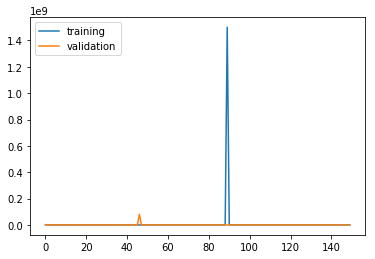

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 20)                5700      
_________________________________________________________________
activation_8 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               2100      
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 30)               

In [0]:
#deep_train_predict = model.predict(x_train)
deep_test_predict = model.predict(x_test)
#print("MAPE value of DeepL train:",mape_find(y_train,deep_train_predict))
#print("MAPE value of DeepL test:",mape_find(y_test,deep_test_predict))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,deep_test_predict)))


RMSE 35.72078602039825
